# Indice vetro

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from jax import grad
from jax import numpy as jnp

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val
from interpolazione import Interpolazione as LinearInterpolation

sys.path.append(dir_path)

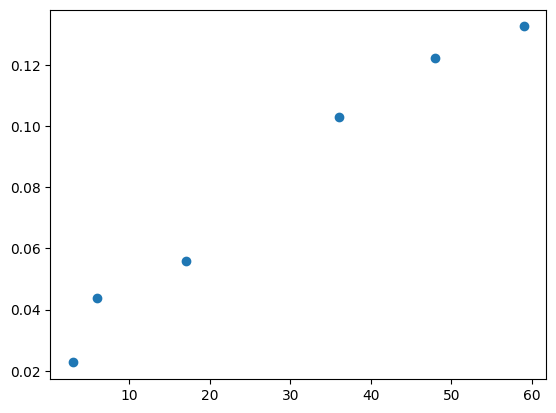

In [2]:
αi = np.array([-2.4, -2.4, -2.4, -2.4, -2.4, -2.4])
αf = np.array([-1.1, 0.1, 0.8, 3.5, 4.6, 5.2])
ΔN = np.array([3, 6, 17, 36, 48, 59])

Δα = np.radians(αf - αi)
sigmaα = np.radians(0.1)
λ = 632.8 * 10**(-9)
d = 0.00575

plt.plot(ΔN, Δα, 'o')

$n_{vetro} = \frac{(2d − \Delta N \lambda)(1 − \cos\Delta\alpha)}{2d · (1 − \cos\Delta\alpha) − \Delta N \lambda }$


In [3]:
def n_vetro_f(Δα, ΔN):
    num = (2*d - ΔN*λ)*(1 - jnp.cos(Δα))
    den = 2*d*(1 - jnp.cos(Δα)) - ΔN*λ
    return num/den
    
def sigma_n_vetro(Δα, ΔN,sigmaα):
    return np.abs(np.array([grad(n_vetro_f, 0)(α, N) for α, N in zip(Δα, ΔN)])*sigmaα)

n_vetro = n_vetro_f(Δα, ΔN)
sigma_n_vetro = sigma_n_vetro(Δα, ΔN, sigmaα)

print(n_vetro)
print(sigma_n_vetro)

[2.78779603 1.53061562 2.49726895 1.59418001 1.54472983 1.58108815]
[0.76693538 0.06502506 0.23399681 0.03225195 0.02419214 0.02435617]
